**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [295]:
import sklearn as sk

<br>

### 2. Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [299]:
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [302]:
df = pd.read_csv('churn_data.csv')

In [303]:
df.shape

(7043, 21)

<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [307]:
df1 = df.drop(['customerID'], axis=1)

<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharge의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [312]:
print(df['TotalCharges'].dtype)

object


In [313]:
df1['TotalCharges'] = df1['TotalCharges'].replace(' ',0)

In [314]:
df1['TotalCharges'] = df1['TotalCharges'].astype('float')

In [315]:
df2 = df1.copy()

<br>

### 6. df2에서 churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고 df2를 df3에 저장하세요.
### df2의 churn 컬럼의 Yes, No를 각각 1, 0으로 변환한 후 df3의 churn 컬럼에 저장하세요.

In [318]:
df2['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [319]:
df3 = df2.copy()

In [320]:
import numpy as np
df3['Churn'] = df2['Churn'].map({'Yes': 1, 'No': 0})
df3['Churn'] = np.where(df2['Churn'] == 'Yes', 1, 0)

In [321]:
df3['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* df3을 df4에 저장하세요.
* df4의 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* df4의 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.

In [325]:
df4 = df3.copy()

In [326]:
df4 = df4.drop(columns=df4.columns[df4.isnull().mean() >= 0.4])

In [327]:
df4.isnull().sum()

gender              9
SeniorCitizen       1
Partner             0
Dependents          2
tenure              0
PhoneService        3
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            1
PaperlessBilling    0
PaymentMethod       1
MonthlyCharges      1
TotalCharges        0
Churn               0
dtype: int64

In [328]:
df4 = df4.dropna()

In [329]:
df4.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<br>

### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요. 
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

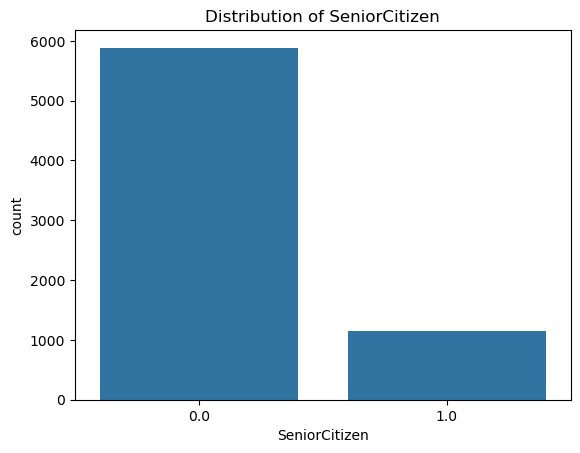

In [337]:
sns.countplot( x='SeniorCitizen', data = df4)
plt.title('Distribution of SeniorCitizen')
plt.show()

df4 = df4.drop(columns=['SeniorCitizen'])

<br>

### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요.
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

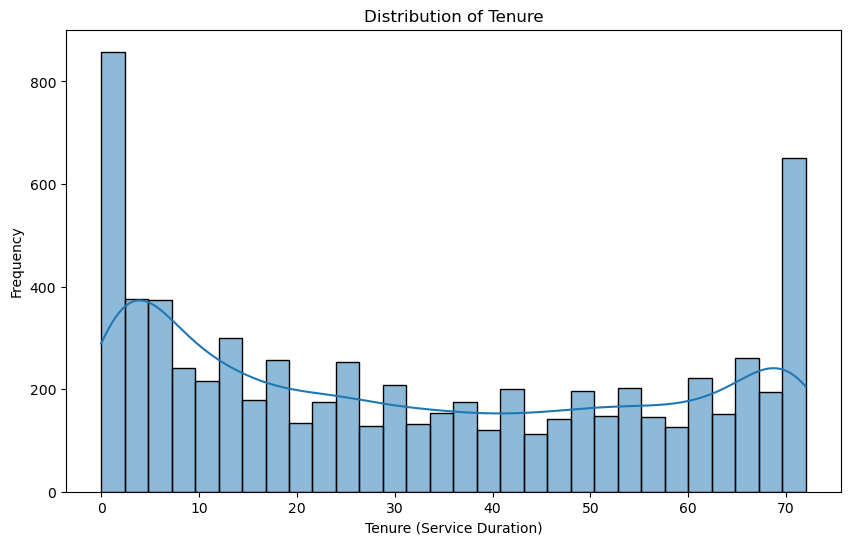

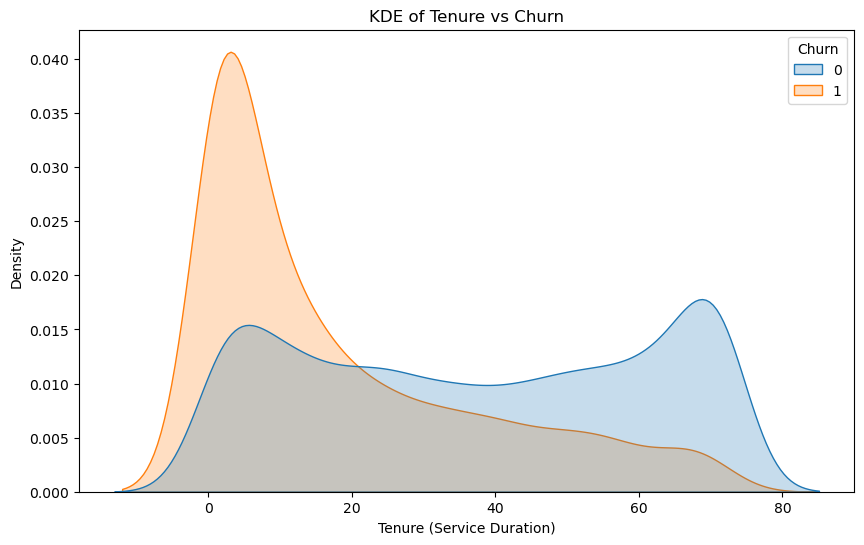

          tenure     Churn
tenure  1.000000 -0.352422
Churn  -0.352422  1.000000
서비스 사용시간이 길어질 수록 이탈이 적다. : 
O


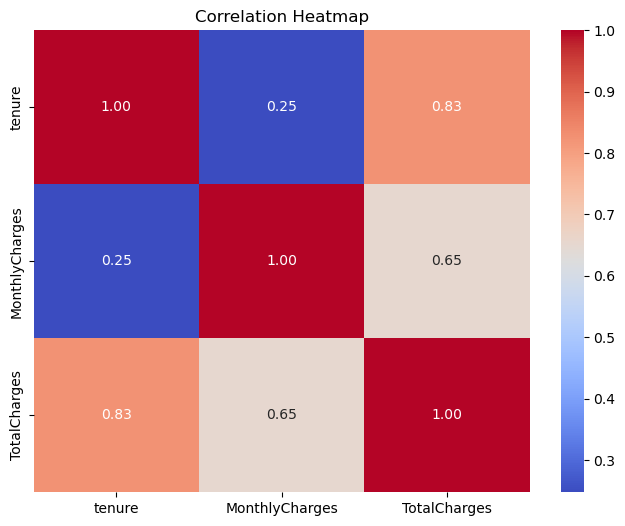

가장 높은 상관계수 값:  0.8261716050603641


In [340]:
plt.figure(figsize=(10, 6))
sns.histplot(df4['tenure'], kde=True, bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Service Duration)')
plt.ylabel('Frequency')
plt.show()

# 2. 'tenure'와 'churn'에 대한 kdeplot 시각화
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df4, x='tenure', hue='Churn', common_norm=False, fill=True)
plt.title('KDE of Tenure vs Churn')
plt.xlabel('Tenure (Service Duration)')
plt.ylabel('Density')
plt.show()

# O, X 출력
correlation = df4[['tenure', 'Churn']].corr()
print(correlation)
print("서비스 사용시간이 길어질 수록 이탈이 적다. : ")
if correlation.loc['tenure', 'Churn'] < 0:
    print("O") 
else:
    print("X")

# 3. 'tenure', 'MonthlyCharges', 'TotalCharges' 컬럼간의 상관관계 확인 후 heatmap 시각화
correlation_matrix = df4[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

correlation = df4['tenure'].corr(df4['TotalCharges'])
# 가장 높은 상관계수 출력
print(f"가장 높은 상관계수 값: ",correlation)

<br>

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [347]:
object_cols = [column for column in df4.columns if df4[column].dtype == 'object']

In [348]:
object_cols = df4.select_dtypes(include='object').columns.tolist()

In [349]:
df5 = pd.get_dummies(df4, columns=object_cols, drop_first=True, dtype=int)

<br>

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [352]:
from sklearn.model_selection import train_test_split
target = 'Churn'
X = df5.drop(columns=target)
y = df5.loc[:,target]
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

<br>

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [355]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

<br>

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요. 
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [359]:
from sklearn.metrics import accuracy_score

In [361]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
model_lg.score(X_train, y_train)
y_pred1 = model_lg.predict(X_valid)

In [362]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
model_knn.score(X_train, y_train)
y_pred2 = (model_knn.predict(X_valid) > 0.5).astype("int32")
accuracy_score(y_valid, y_pred2)

0.7496443812233285

In [363]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
model_dt.fit(X_train, y_train)
model_dt.score(X_train, y_train)
y_pred3 = (model_dt.predict(X_valid) > 0.5).astype("int32")
accuracy_score(y_valid, y_pred3)

0.7788051209103841

In [364]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=3, random_state=42)
model_rf.fit(X_train, y_train)
model_rf.score(X_train, y_train)
y_pred4 = (model_rf.predict(X_valid) > 0.5).astype("int32")
accuracy_score(y_valid, y_pred4)

0.7638691322901849

In [365]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=3, random_state=42)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_train, y_train)
y_pred5 = (model_xgb.predict(X_valid) > 0.5).astype("int32")
accuracy_score(y_valid, y_pred5)

0.7965860597439545

In [366]:
from lightgbm import LGBMClassifier
model_lgbm = LGBMClassifier(n_estimators=3, random_state=42)
model_lgbm.fit(X_train, y_train)
model_lgbm.score(X_train, y_train)
y_pred6 = (model_lgbm.predict(X_valid) > 0.5).astype("int32")
accuracy_score(y_valid, y_pred6)

[LightGBM] [Info] Number of positive: 1493, number of negative: 4128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 631
[LightGBM] [Info] Number of data points in the train set: 5621, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265611 -> initscore=-1.017006
[LightGBM] [Info] Start training from score -1.017006


0.7347083926031295

### 14. 바로 위 Light GBM 모델의 성능을 평가하려고 합니다. 
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요. 
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

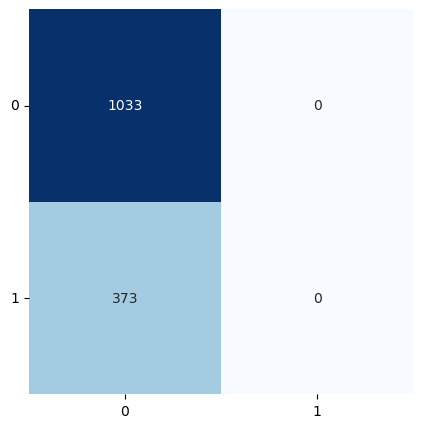

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       373

    accuracy                           0.73      1406
   macro avg       0.37      0.50      0.42      1406
weighted avg       0.54      0.73      0.62      1406



In [371]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = np.where(y_pred6 >= 0.5, 1, 0)

# 혼동 행렬 생성 및 시각화
cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,
            annot=True,
            cmap='Blues',
            cbar=False,
            square=True,
            fmt='d')
plt.yticks(rotation=360)
plt.xticks(rotation=360)
plt.show()

# 분류 보고서 출력
print(classification_report(y_valid, y_pred, zero_division=0)) #  정확도가 정의되지 않은 경우 0으로 처리

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [373]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [375]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# 딥러닝 모델 정의
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu', ))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_valid, y_valid))

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7066 - loss: 0.5259 - val_accuracy: 0.7802 - val_loss: 0.4447
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8000 - loss: 0.4222 - val_accuracy: 0.7909 - val_loss: 0.4379
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8086 - loss: 0.4156 - val_accuracy: 0.7902 - val_loss: 0.4343
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8091 - loss: 0.4112 - val_accuracy: 0.7873 - val_loss: 0.4337
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8116 - loss: 0.4075 - val_accuracy: 0.7866 - val_loss: 0.4312
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8127 - loss: 0.4059 - val_accuracy: 0.7881 - val_loss: 0.4316
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8156 - loss: 0.4052 - val_accuracy: 0.7859 - val_loss: 0.4309
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8188 - loss: 0.4016 - val_accuracy: 0.

<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 accuracy와 검증 accuracy를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_acc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

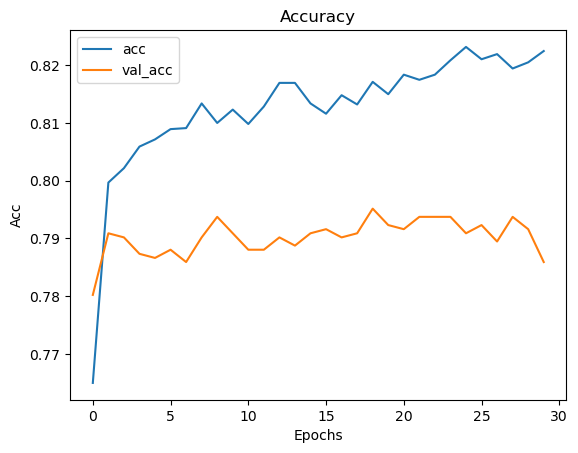

In [378]:
import matplotlib.pyplot as plt

# 학습 accuracy와 검증 accuracy를 그래프로 표시
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

# 그래프 타이틀과 레이블 설정
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

In [379]:
y_pred = (model.predict(X_valid) > 0.5).astype("int32")
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)
print(confusion_matrix(y_valid,y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
0.7859174964438123
[[927 106]
 [195 178]]


### [선택] 모든 과정을 수행한 후에는 머신러닝, 딥러닝 모델의 성능을 향상시켜보세요.

In [381]:
!pip install imbalanced-learn

In [382]:
# 오버샘플링
from imblearn.over_sampling import SMOTE
smote = SMOTE()
s_x_train, s_y_train = smote.fit_resample(X_train, y_train)

In [383]:
# # 언더샘플링
# from imblearn.under_sampling import RandomUnderSampler
# under_sample = RandomUnderSampler()
# u_x_train, u_x_train = under_sample.fit_resample(X_train, y_train)

In [385]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# 딥러닝 모델 정의
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(s_x_train, s_y_train, epochs=30, batch_size=16, validation_data=(X_valid, y_valid))

Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7279 - loss: 0.5536 - val_accuracy: 0.7041 - val_loss: 0.5576
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7707 - loss: 0.4824 - val_accuracy: 0.6927 - val_loss: 0.5735
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7808 - loss: 0.4690 - val_accuracy: 0.7162 - val_loss: 0.5484
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7824 - loss: 0.4570 - val_accuracy: 0.7326 - val_loss: 0.5308
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7829 - loss: 0.4516 - val_accuracy: 0.7191 - val_loss: 0.5395
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7945 - loss: 0.4441 - val_accuracy: 0.7255 - val_loss: 0.5432
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7971 - loss: 0.4313 - val_accuracy: 0.7319 - val_loss: 0.5429
Epoch 8/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7997 - loss: 0.4269 - val_accuracy: 0.

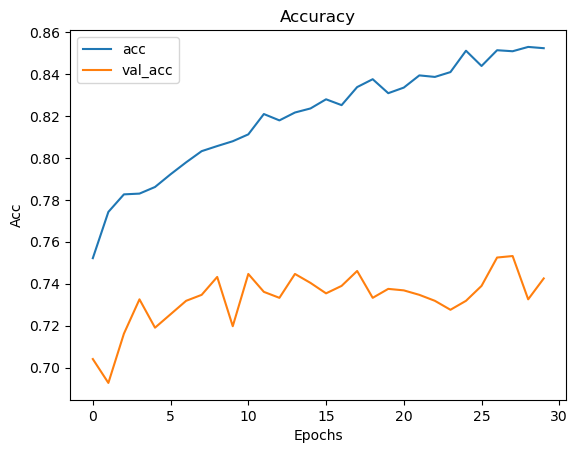

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
0.7425320056899004
[[770 263]
 [ 99 274]]


In [387]:
import matplotlib.pyplot as plt

# 학습 accuracy와 검증 accuracy를 그래프로 표시
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

# 그래프 타이틀과 레이블 설정
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()
y_pred = (model.predict(X_valid) > 0.5).astype("int32")
accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)
print(confusion_matrix(y_valid,y_pred))